In [1]:
%load_ext nb_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "weatherinszeged"
table_name = "weatherinszeged"

db_url = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"

engine = create_engine(db_url)

temp_df = pd.read_sql_query(f"SELECT * FROM {table_name};", con=engine)

# close the db connetion
engine.dispose()

<IPython.core.display.Javascript object>

In [4]:
temp_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<IPython.core.display.Javascript object>

### Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [8]:
X = temp_df[["humidity", "windspeed", "windbearing", "pressure"]]
y = temp_df["temperature"]

<IPython.core.display.Javascript object>

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

line = LinearRegression()
line.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

In [13]:
print(line.intercept_)
line.coef_

37.78794586718251


array([-3.25020508e+01, -2.00599319e-01,  3.99004960e-03, -5.54264925e-04])

<IPython.core.display.Javascript object>

### Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

#### Assumption one: linearity of the model in its coefficients

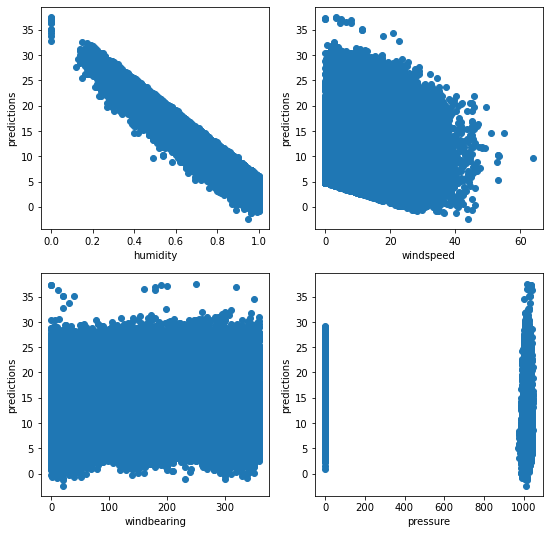

<IPython.core.display.Javascript object>

In [19]:
X_train_pred = line.predict(X_train)
plot_number = 1
plt.figure(figsize=[9, 9])
for col in X_train.columns:
    plt.subplot(2, 2, plot_number)
    plot_number += 1
    plt.scatter(X_train[col], X_train_pred)
    plt.xlabel(col)
    plt.ylabel("predictions")

#### Assumption two: the error term should be zero on average

In [20]:
errors = y_train - X_train_pred

np.mean(errors)

-1.031346859919795e-17

<IPython.core.display.Javascript object>

#### Assumption three: homoscedasticity

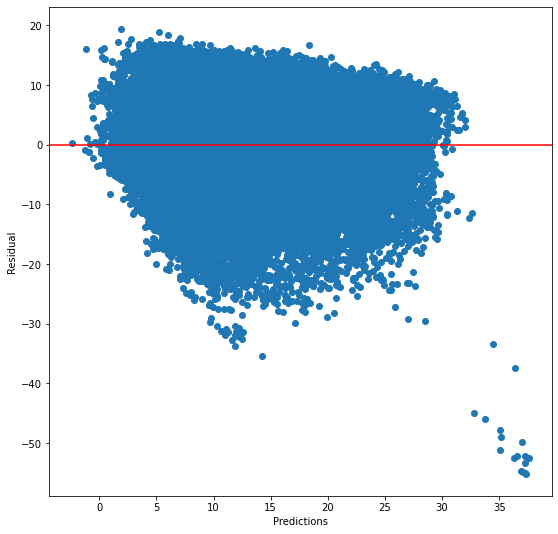

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=[9, 9])
plt.scatter(X_train_pred, errors)
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.axhline(0, color="r")

#### Assumption four: low multicollinearity

In [26]:
temp_df[["humidity", "windspeed", "windbearing", "pressure", "temperature"]].corr()

,humidity,windspeed,windbearing,pressure,temperature
humidity,1.000000,-0.224951,0.000735,0.005454,-0.632255
windspeed,-0.224951,1.000000,0.103822,-0.049263,0.008957
windbearing,0.000735,0.103822,1.000000,-0.011651,0.029988
pressure,0.005454,-0.049263,-0.011651,1.000000,-0.005447
temperature,-0.632255,0.008957,0.029988,-0.005447,1.000000


<IPython.core.display.Javascript object>

#### Assumption five: error terms should be uncorrelated with one another

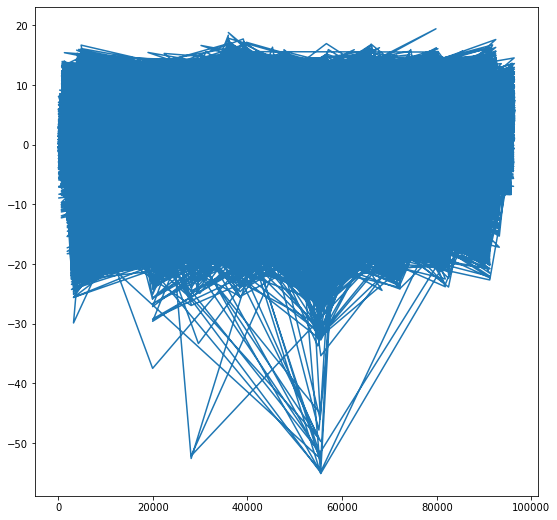

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=[9, 9])
plt.plot(errors)
plt.show()

/Users/abilenky/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/abilenky/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


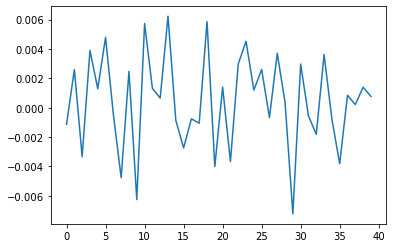

<IPython.core.display.Javascript object>

In [43]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

#### Assumption six: features shouldn't be correlated with the errors

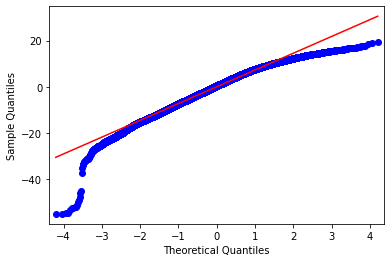

(array([1.3000e+01, 2.0000e+00, 4.0000e+00, 7.6000e+01, 7.4700e+02,
        5.7760e+03, 1.9147e+04, 2.8523e+04, 2.0766e+04, 2.1080e+03]),
 array([-55.10423907, -47.65185195, -40.19946483, -32.74707771,
        -25.2946906 , -17.84230348, -10.38991636,  -2.93752924,
          4.51485788,  11.96724499,  19.41963211]),
 <BarContainer object of 10 artists>)

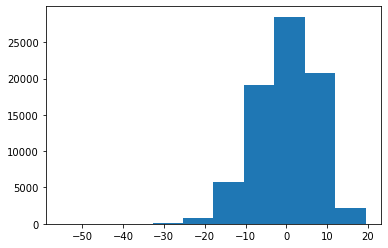

<IPython.core.display.Javascript object>

In [47]:
import statsmodels.api as sm

sm.qqplot(errors, line="s")
plt.show()
plt.hist(errors)

In [49]:
from scipy.stats import jarque_bera, normaltest

print(jarque_bera(errors))
normaltest(errors)

Jarque_beraResult(statistic=2979.435428327803, pvalue=0.0)


NormaltestResult(statistic=2657.592647329391, pvalue=0.0)

<IPython.core.display.Javascript object>